### Scraping Covid data 

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.worldometers.info/coronavirus/'
r = requests.get(url)
if r.status_code==200: 
    html_doc = r.text
print(r)

<Response [200]>


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
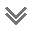

In [7]:
soup = BeautifulSoup(html_doc)
print(soup.prettify())

In [10]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})
print(table.prettify())

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
  <tr>
   <th width="1%">
    #
   </th>
   <th width="100">
    Country,
    <br/>
    Other
   </th>
   <th width="20">
    Total
    <br/>
    Cases
   </th>
   <th width="30">
    New
    <br/>
    Cases
   </th>
   <th width="30">
    Total
    <br/>
    Deaths
   </th>
   <th width="30">
    New
    <br/>
    Deaths
   </th>
   <th width="30">
    Total
    <br/>
    Recovered
   </th>
   <th width="30">
    New
    <br/>
    Recovered
   </th>
   <th width="30">
    Active
    <br/>
    Cases
   </th>
   <th width="30">
    Serious,
    <br/>
    Critical
   </th>
   <th width="30">
    Tot Cases/
    <br/>
    1M pop
   </th>
   <th width="30">
    Deaths/
    <br/>
    1M pop
   </th>
   <th width="30">
    Total
    <br/>
    Tests
   </th>
   <th width="30">
    Tests/
    <br/>
    <nobr>
     1M pop
    <

In [15]:
# Show all of the rows of the table.
rows = table.find_all('tr', attrs={'style': ""})

# Storage for the extracted data.
output = []

# Specify column names.
column_names = ['id', 'Country', 'Total Cases', 'New Cases',
               'Total deaths', 'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases', '2', '3', '4', '5', '6', '7']

# Create a for loop statement.
for country in rows:
    country_data = country.find_all('td')
    if country_data:
        # extract the text within each element
        country_text = [td.text for td in country_data]
        output.append(dict(zip(column_names, country_text)))

# View output.
output

[{'id': '',
  'Country': 'World',
  'Total Cases': '550,320,907',
  'New Cases': '+475,797',
  'Total deaths': '6,352,855',
  'New Deaths': '+666',
  'Total Recovered': '526,008,040',
  'New Recovered': '+419,591',
  'Active Cases': '17,960,012',
  '2': '36,512',
  '3': '70,601',
  '4': '815.0',
  '5': '',
  '6': '',
  '7': ''},
 {'id': '1',
  'Country': 'USA',
  'Total Cases': '88,910,140',
  'New Cases': '',
  'Total deaths': '1,041,027 ',
  'New Deaths': '',
  'Total Recovered': '84,604,107',
  'New Recovered': '',
  'Active Cases': '3,265,006',
  '2': '3,171',
  '3': '265,522',
  '4': '3,109',
  '5': '1,049,371,874',
  '6': '3,133,852',
  '7': '334,850,530 '},
 {'id': '2',
  'Country': 'India',
  'Total Cases': '43,420,608',
  'New Cases': '',
  'Total deaths': '525,047 ',
  'New Deaths': '',
  'Total Recovered': '42,797,092',
  'New Recovered': '',
  'Active Cases': '98,469',
  '2': '698',
  '3': '30,863',
  '4': '373',
  '5': '861,489,400',
  '6': '612,330',
  '7': '1,406,902,807

In [14]:
import pandas as pd 
data = pd.DataFrame(output)

# View the DataFrame.
data.head()

,id,Country,Total Cases,New Cases,Total deaths,New Deaths,Total Recovered,New Recovered,Active Cases,2,3,4,5,6,7
0,,\nNorth America\n,"105,010,665","+4,632","1,485,862",+21,"98,612,581","+16,541","4,912,222","8,526",,,,,
1,,\nAsia\n,"160,953,671","+103,679","1,438,786",+177,"155,387,303","+151,918","4,127,582","10,473",,,,,
2,,\nSouth America\n,"59,445,859","+6,534","1,304,273",+14,"56,353,023","+15,756","1,788,563","10,362",,,,,
3,,\nEurope\n,"202,906,475","+319,145","1,854,181",+357,"194,844,803","+227,512","6,207,491","5,987",,,,,
4,,\nOceania\n,"9,701,375","+37,252","13,935",+90,"9,328,293","+6,459","359,147",156,,,,,
